# Classifier fc nn to predict the DRESS (shirt , t-shirt , trouser etc )

## loading the data 

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

26422272it [00:30, 860086.99it/s]                              


Extracting C:\Users\LEO/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\LEO/.pytorch/F_MNIST_data/FashionMNIST\raw



29696it [00:00, 99179.56it/s]                           


Extracting C:\Users\LEO/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\LEO/.pytorch/F_MNIST_data/FashionMNIST\raw



4422656it [00:13, 333766.04it/s]                             


Extracting C:\Users\LEO/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\LEO/.pytorch/F_MNIST_data/FashionMNIST\raw



6144it [00:00, 1361177.04it/s]          

Extracting C:\Users\LEO/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\LEO/.pytorch/F_MNIST_data/FashionMNIST\raw




C:\Users\LEO\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Here we can see one of the images.

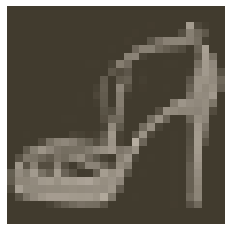

In [5]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## building the Network classifier class 

In [20]:
import torch
from torch import nn , optim
import torch.nn.functional as F


class Classifier (nn.Module) :
    def __init__(self) :
        
        super().__init__()
        self.fc1  = nn.Linear(784 , 256 )
        self.fc2  = nn.Linear(256,128 )
        self.fc3 =  nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x) :
        #first make the input image flattern 
        
        x = x.view(x.shape[0], -1)
    
        relu1 = F.relu(self.fc1(x))
        relu2 = F.relu(self.fc2(relu1))
        relu3 = F.relu(self.fc3(relu2))
        ret = F.log_softmax(self.fc4(relu3) ,  dim = 1 )
        return ret 
        
    



In [21]:
#model , loss function and optimizier 
model = Classifier()
criterion = nn.NLLLoss()
Optimizer =  optim.Adam(model.parameters() , lr=0.003)



## Training the Network from here 

In [23]:
#defining no of epohs 
Epohs = 5 

for i in range( Epohs ) :
    running_loss  =  0
    for image,label in  trainloader :

        #forward
        logit = model.forward(image )
        loss =  criterion(logit, label)
        
        #clear the tensor optimizier 
        Optimizer.zero_grad()
        
        #backward
        loss.backward()
        
        #update the weight values .....
        
        Optimizer.step()
        
        #Summing the loss values ..
        running_loss += loss.item()
        
    else :
        print("Prediction loss", running_loss / len(trainloader))
        
        

Prediction loss 0.2996980904150746
Prediction loss 0.29193064318632267
Prediction loss 0.2806408320948767
Prediction loss 0.2749015721700974
Prediction loss 0.2650873799965199


## Predicting 

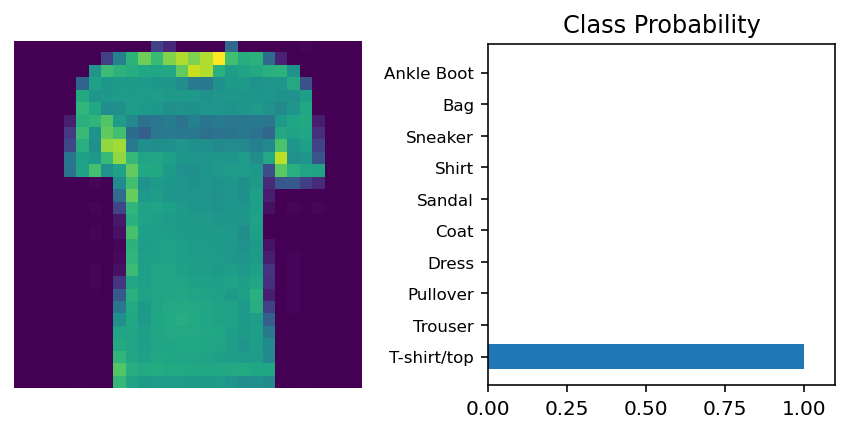

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper


dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Output of the network are log-probabilities, need to take exponential for probabilities
with torch.no_grad() :
    logits = model.forward(img)
ps = torch.exp(logits)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')